In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from prophet.diagnostics import cross_validation
#from prophet.diagnostics import performance_metrics
#from prophet.plot import plot_cross_validation_metric

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Eleccion Modelo ML

In [3]:
mensual = pd.read_csv('raw/mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

In [4]:
mensual.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194


## Preparacion

In [5]:
mensual['fecha_numeros']=mensual.index.map(datetime.datetime.toordinal)

### Verificacion de estacionariedad

In [6]:
#H0: No es estacionaria
#H1: Es estacionaria
def adfuller_test(trips):
    result = adfuller(trips)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('Es estacionaria.')
    else:
        print('No es estacionaria.')

In [7]:
adfuller_test(mensual.n_trips)

ADF Test Statistic : -1.7431880032854776
p-value : 0.40900921939177587
#Lags Used : 5
Number of Observations Used : 24
No es estacionaria.


## Frecuencia Mensual

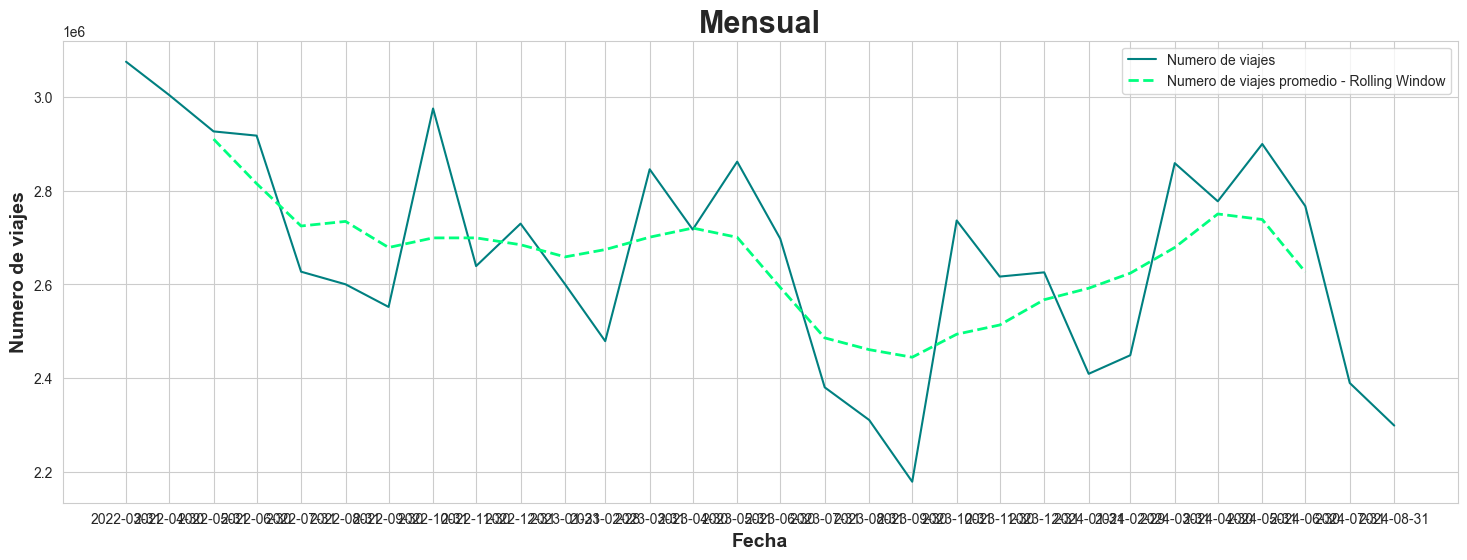

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,6))

ventana = (5)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
plt.plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
plt.plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
plt.xlabel('Fecha',fontsize=14, fontweight='bold')
plt.ylabel('Numero de viajes',fontsize=14, fontweight='bold')
plt.xticks(ticks=mensual.index)
plt.title('Mensual',fontsize=22, fontweight='bold')
plt.legend()

In [61]:
mensual['month_diff'] = mensual['n_trips'] - mensual['n_trips'].shift(1)
mensual['month_diff']

pickup_datetime
2022-03-31         NaN
2022-04-30    -70874.0
2022-05-31    -77764.0
2022-06-30     -9018.0
2022-07-31   -290173.0
2022-08-31    -26936.0
2022-09-30    -48247.0
2022-10-31    423212.0
2022-11-30   -336090.0
2022-12-31     90528.0
2023-01-31   -129233.0
2023-02-28   -121416.0
2023-03-31    366566.0
2023-04-30   -128503.0
2023-05-31    144793.0
2023-06-30   -164274.0
2023-07-31   -317085.0
2023-08-31    -69654.0
2023-09-30   -131655.0
2023-10-31    557189.0
2023-11-30   -119632.0
2023-12-31      9011.0
2024-01-31   -216426.0
2024-02-29     39610.0
2024-03-31    409709.0
2024-04-30    -81299.0
2024-05-31    122177.0
2024-06-30   -132507.0
2024-07-31   -377281.0
2024-08-31    -90750.0
Name: month_diff, dtype: float64

In [62]:
adfuller_test(mensual['month_diff'].dropna())

ADF Test Statistic : -5.609450452346364
p-value : 1.212893273492976e-06
#Lags Used : 3
Number of Observations Used : 25
Es estacionaria.


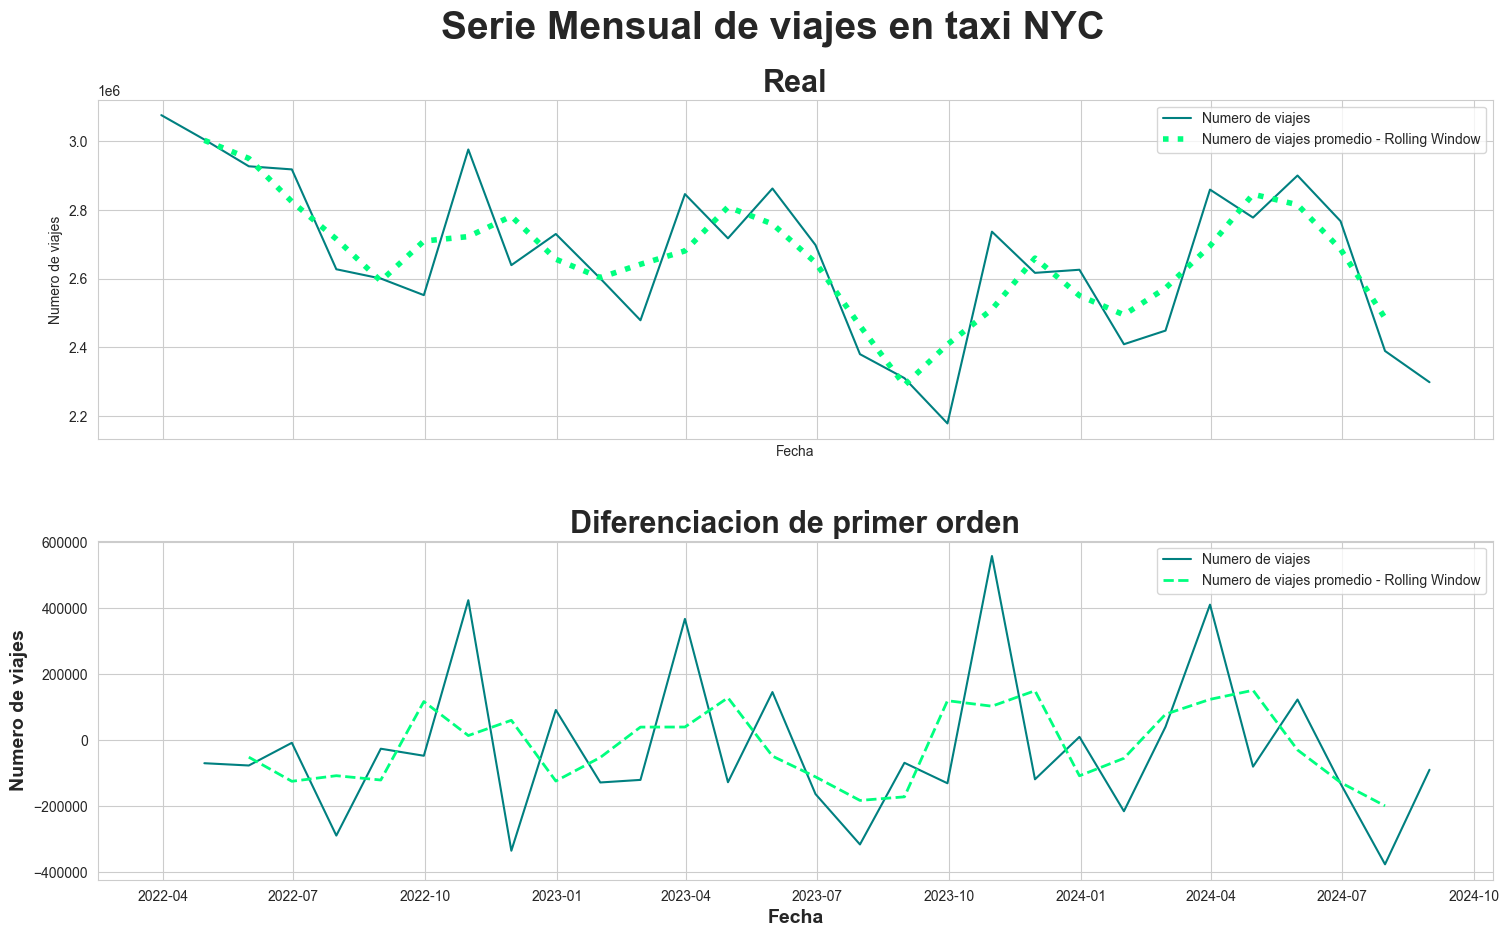

In [63]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,1, figsize = (18,10), gridspec_kw={'height_ratios': [1,1]}, sharex=True)
fig.suptitle("Serie Mensual de viajes en taxi NYC",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.89,hspace=0.3)

ventana = (3)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
ax[0].plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
ax[0].plot(mensual_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Numero de viajes')
ax[0].set_title('Real',fontsize=22, fontweight='bold')
ax[0].legend()

ventana = (3)
mensual_promedio_tendencia = mensual['month_diff'].rolling(window=ventana, center = True).mean()
ax[1].plot(mensual.index, mensual['month_diff'], label = 'Numero de viajes', color='teal')
ax[1].plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[1].set_xlabel('Fecha',fontsize=14, fontweight='bold')
ax[1].set_ylabel('Numero de viajes',fontsize=14, fontweight='bold')
ax[1].set_title('Diferenciacion de primer orden',fontsize=22, fontweight='bold')
ax[1].legend()

plt.show()

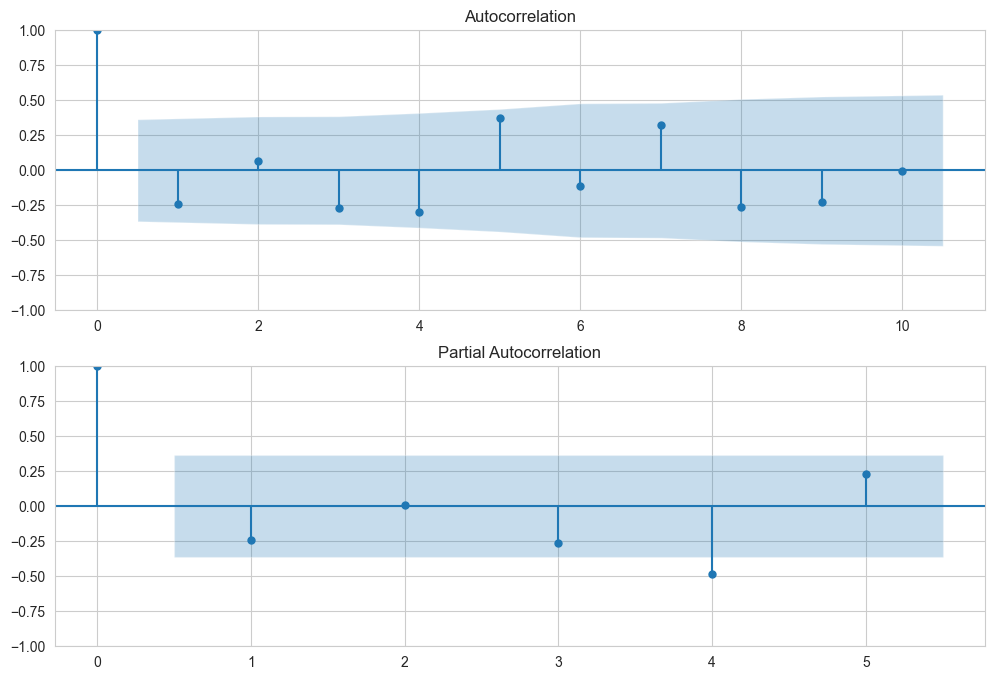

In [29]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mensual['month_diff'].iloc[1:], lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mensual['month_diff'].iloc[1:], lags=5, ax=ax2)
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA

## ARIMA

- p: orden del modelo AR (autoregresivo)
- d: orden de integración (número de diferencias no estacionales)
- q: orden del modelo MA (media móvil)

In [64]:
model = ARIMA(mensual['month_diff'],order=(2,1,1))
model_fit=model.fit()

In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             month_diff   No. Observations:                   30
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -401.179
Date:                Thu, 21 Nov 2024   AIC                            810.359
Time:                        23:42:55   BIC                            815.828
Sample:                    03-31-2022   HQIC                           812.072
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1636      0.516     -0.317      0.751      -1.174       0.847
ar.L2          0.0658      0.587      0.112      0.911      -1.085       1.216
ma.L1         -0.9461      0.382     -2.477      0.013      -1.695      -0.197
sigma2      8.221e+10   3.23e-12   2.54e+22      0.000    8.22e+10    8.22e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.77   Prob(JB):                         0.06
Heteroskedasticity (H):               1.27   Skew:                             0.98
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [65]:
last_date = mensual.index[-1]
forecast=model_fit.predict(start = last_date, end = last_date + pd.DateOffset(months=12), dynamic = True)

In [66]:
forecast_df = pd.DataFrame({'month_diff': forecast}, index=pd.date_range(start=last_date, periods=13, freq='M')[1:])
forecast_df

,month_diff
2024-09-30,-55276.399717
2024-10-31,-15250.489599
2024-11-30,-27202.746755
2024-12-31,-22615.826158
2025-01-31,-24152.009099
2025-02-28,-23599.126925
2025-03-31,-23790.571542
2025-04-30,-23722.902790
2025-05-31,-23746.559575
2025-06-30,-23738.240554


In [39]:
forecast_df

,month_diff
2024-09-30,-55276.399717
2024-10-31,-15250.489599
2024-11-30,-27202.746755
2024-12-31,-22615.826158
2025-01-31,-24152.009099
2025-02-28,-23599.126925
2025-03-31,-23790.571542
2025-04-30,-23722.902790
2025-05-31,-23746.559575
2025-06-30,-23738.240554


In [40]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros,month_diff
pickup_datetime,,,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023,738245,NaN
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149,738275,-70874.0
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385,738306,-77764.0
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367,738336,-9018.0
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194,738367,-290173.0
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258,738398,-26936.0
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011,738428,-48247.0
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223,738459,423212.0
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133,738489,-336090.0


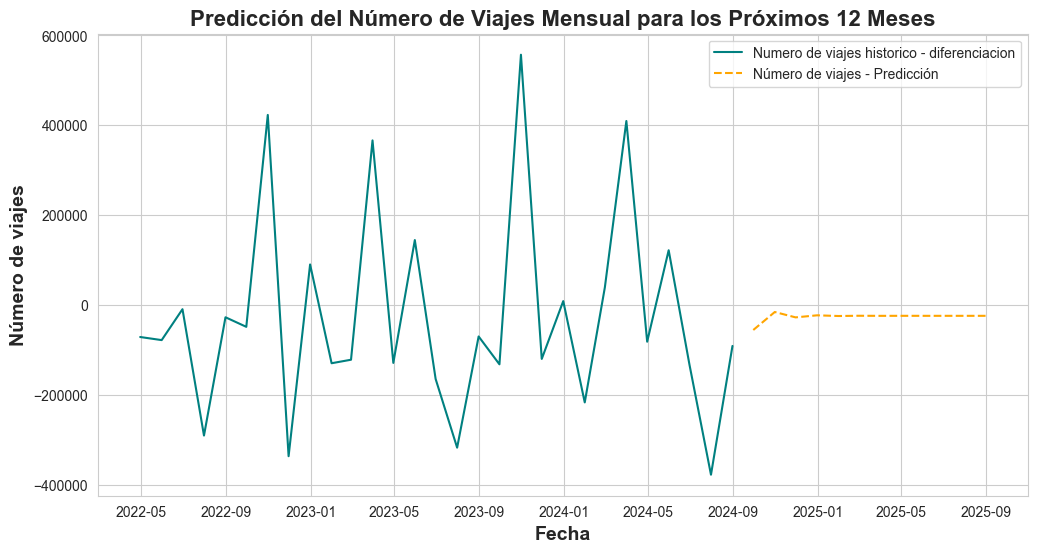

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(mensual.index, mensual['month_diff'], label='Numero de viajes historico - diferenciacion', color='teal')
plt.plot(forecast_df.index,forecast_df['month_diff'] , label='Número de viajes - Predicción', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual para los Próximos 12 Meses', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [69]:
# 'differenced_series' es la serie de valores diferenciados
# 'original_series' es la serie original antes de diferenciar

# Valor inicial de la serie (puede ser el primer valor de original_series)
initial_value = mensual['n_trips'].iloc[0]

# Integrar la serie diferenciada usando cumsum
restored_series = mensual['month_diff'].cumsum() + initial_value

# Si estás trabajando con una columna específica de un DataFrame:
mensual['restored_series'] = mensual['month_diff'].cumsum() + mensual['n_trips'].shift(1).fillna(method='bfill')


In [43]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros,month_diff,restored_series
pickup_datetime,,,,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023,738245,NaN,NaN
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149,738275,-70874.0,3004149.0
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385,738306,-77764.0,2855511.0
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367,738336,-9018.0,2768729.0
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194,738367,-290173.0,2469538.0
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258,738398,-26936.0,2152429.0
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011,738428,-48247.0,2077246.0
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223,738459,423212.0,2452211.0
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133,738489,-336090.0,2539333.0


In [70]:
restored_series = mensual['month_diff'].copy()

restored_series.iloc[0] = mensual['n_trips'].iloc[0]

for i in range(1, len(restored_series)):
    restored_series.iloc[i] = restored_series.iloc[i] + restored_series.iloc[i - 1]

mensual['restored_series'] = restored_series


In [71]:
restored_series = forecast_df['month_diff'].copy()

restored_series.iloc[0] = mensual['n_trips'].iloc[-1]

for i in range(1, len(restored_series)):
    restored_series.iloc[i] = restored_series.iloc[i] + restored_series.iloc[i - 1]

forecast_df['n_trips'] = restored_series

In [46]:
forecast_df

,month_diff,n_trips
2024-09-30,-55276.399717,2.299001e+06
2024-10-31,-15250.489599,2.283751e+06
2024-11-30,-27202.746755,2.256548e+06
2024-12-31,-22615.826158,2.233932e+06
2025-01-31,-24152.009099,2.209780e+06
2025-02-28,-23599.126925,2.186181e+06
2025-03-31,-23790.571542,2.162390e+06
2025-04-30,-23722.902790,2.138667e+06
2025-05-31,-23746.559575,2.114921e+06
2025-06-30,-23738.240554,2.091183e+06


In [47]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros,month_diff,restored_series
pickup_datetime,,,,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023,738245,NaN,3075023.0
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149,738275,-70874.0,3004149.0
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385,738306,-77764.0,2926385.0
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367,738336,-9018.0,2917367.0
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194,738367,-290173.0,2627194.0
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258,738398,-26936.0,2600258.0
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011,738428,-48247.0,2552011.0
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223,738459,423212.0,2975223.0
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133,738489,-336090.0,2639133.0


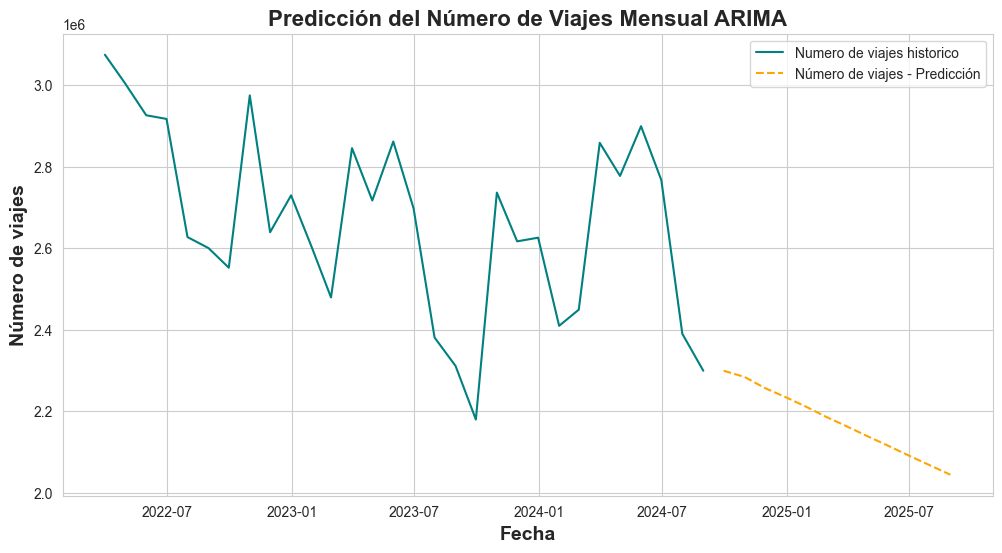

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(mensual.index, mensual['n_trips'], label='Numero de viajes historico', color='teal')
plt.plot(forecast_df.index,forecast_df['n_trips'] , label='Número de viajes - Predicción', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual ARIMA', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## SARIMA

In [50]:
# Parámetros para SARIMA: p, d, q, P, D, Q, m
p, d, q = 2, 1, 1  # Componentes no estacionales
P, D, Q, m = 1, 1, 1, 12  # Componentes estacionales, con m=12 para indicar una estacionalidad de 12 meses

# Definir el modelo SARIMA
sarima_model = SARIMAX(mensual['month_diff'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Ajustar el modelo SARIMA
sarima_fit = sarima_model.fit(disp=False)

# Generar pronóstico para los próximos 12 meses
last_date = mensual.index[-1]
forecast_steps = 12
sarima_forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Crear DataFrame de predicción con el índice de fechas
forecast_df = sarima_forecast.summary_frame()
forecast_df.index = forecast_index


In [51]:
forecast_df

month_diff,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-09-30,-2.998676e+05,1.066864e+05,-5.089690e+05,-9.076613e+04
2024-10-31,5.162160e+05,1.075560e+05,3.054101e+05,7.270219e+05
2024-11-30,-6.146676e+05,3.066683e+05,-1.215726e+06,-1.360874e+04
2024-12-31,1.058337e+05,3.374157e+05,-5.554890e+05,7.671563e+05
2025-01-31,-1.325838e+06,8.270752e+05,-2.946875e+06,2.951998e+05
2025-02-28,7.153823e+05,1.066434e+06,-1.374789e+06,2.805554e+06
2025-03-31,-2.509360e+06,2.334894e+06,-7.085668e+06,2.066949e+06
2025-04-30,2.964050e+06,3.466220e+06,-3.829617e+06,9.757717e+06
2025-05-31,-8.061858e+06,6.945047e+06,-2.167390e+07,5.550184e+06
2025-06-30,1.094199e+07,1.125679e+07,-1.112092e+07,3.300490e+07


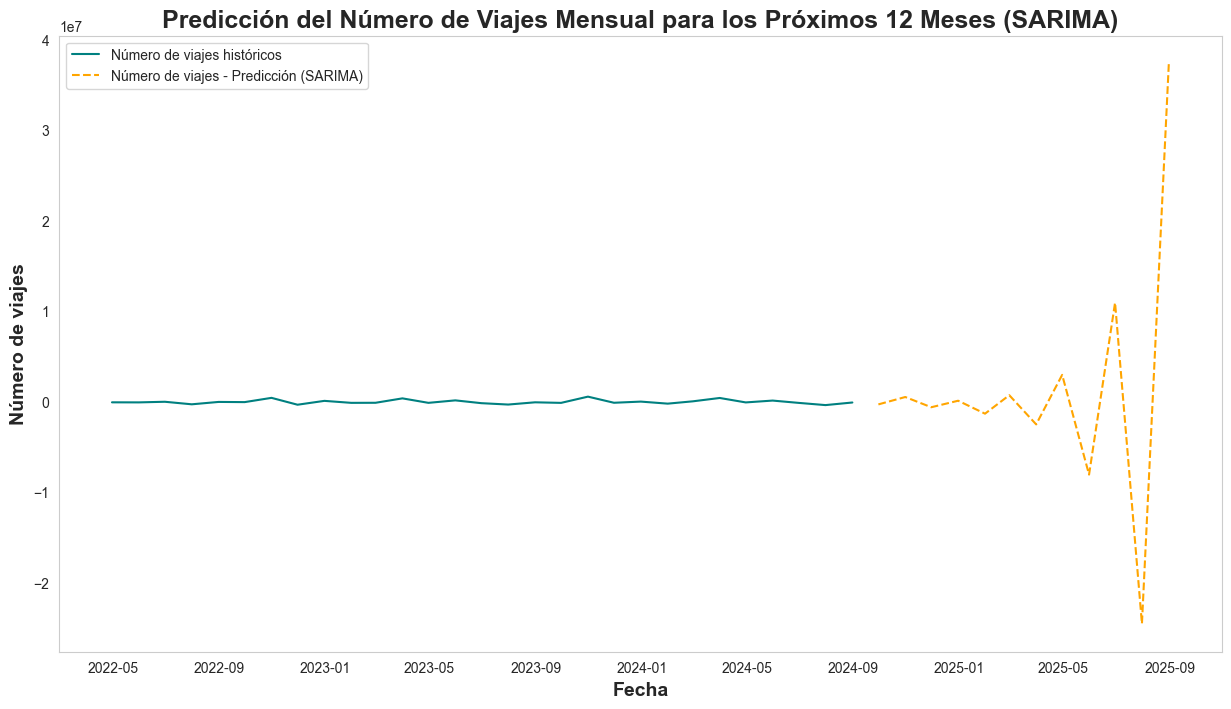

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
plt.plot(mensual.index, mensual['month_diff'], label='Número de viajes históricos', color='teal')
plt.plot(forecast_df.index, forecast_df['mean'], label='Número de viajes - Predicción (SARIMA)', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual para los Próximos 12 Meses (SARIMA)', fontsize=18, fontweight='bold')
plt.legend()
plt.grid()
plt.show()

In [53]:
restored_series = forecast_df['mean'].copy()

restored_series.iloc[0] = mensual['n_trips'].iloc[-1]

for i in range(1, len(restored_series)):
    restored_series.iloc[i] = restored_series.iloc[i] + restored_series.iloc[i - 1]

forecast_df['n_trips'] = restored_series

In [54]:
forecast_df

month_diff,mean,mean_se,mean_ci_lower,mean_ci_upper,n_trips
2024-09-30,-2.998676e+05,1.066864e+05,-5.089690e+05,-9.076613e+04,2.299001e+06
2024-10-31,5.162160e+05,1.075560e+05,3.054101e+05,7.270219e+05,2.815217e+06
2024-11-30,-6.146676e+05,3.066683e+05,-1.215726e+06,-1.360874e+04,2.200549e+06
2024-12-31,1.058337e+05,3.374157e+05,-5.554890e+05,7.671563e+05,2.306383e+06
2025-01-31,-1.325838e+06,8.270752e+05,-2.946875e+06,2.951998e+05,9.805453e+05
2025-02-28,7.153823e+05,1.066434e+06,-1.374789e+06,2.805554e+06,1.695928e+06
2025-03-31,-2.509360e+06,2.334894e+06,-7.085668e+06,2.066949e+06,-8.134322e+05
2025-04-30,2.964050e+06,3.466220e+06,-3.829617e+06,9.757717e+06,2.150618e+06
2025-05-31,-8.061858e+06,6.945047e+06,-2.167390e+07,5.550184e+06,-5.911239e+06
2025-06-30,1.094199e+07,1.125679e+07,-1.112092e+07,3.300490e+07,5.030751e+06


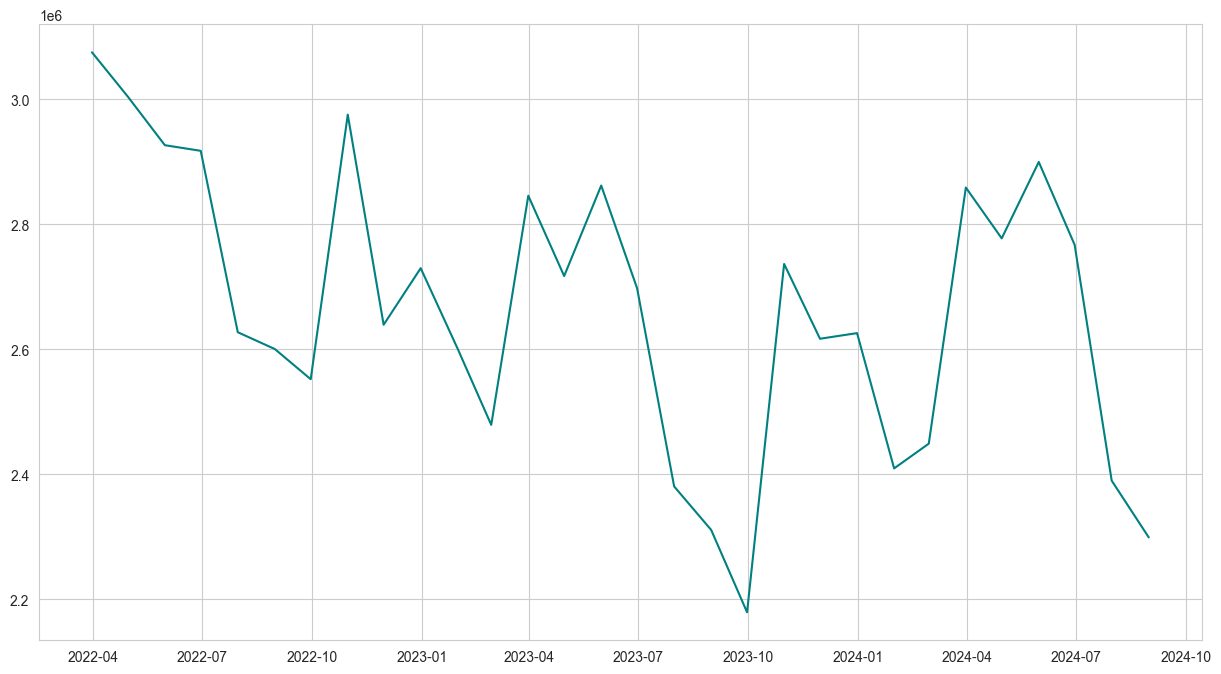

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
plt.plot(mensual.index, mensual['n_trips'], label='Número de viajes históricos', color='teal')


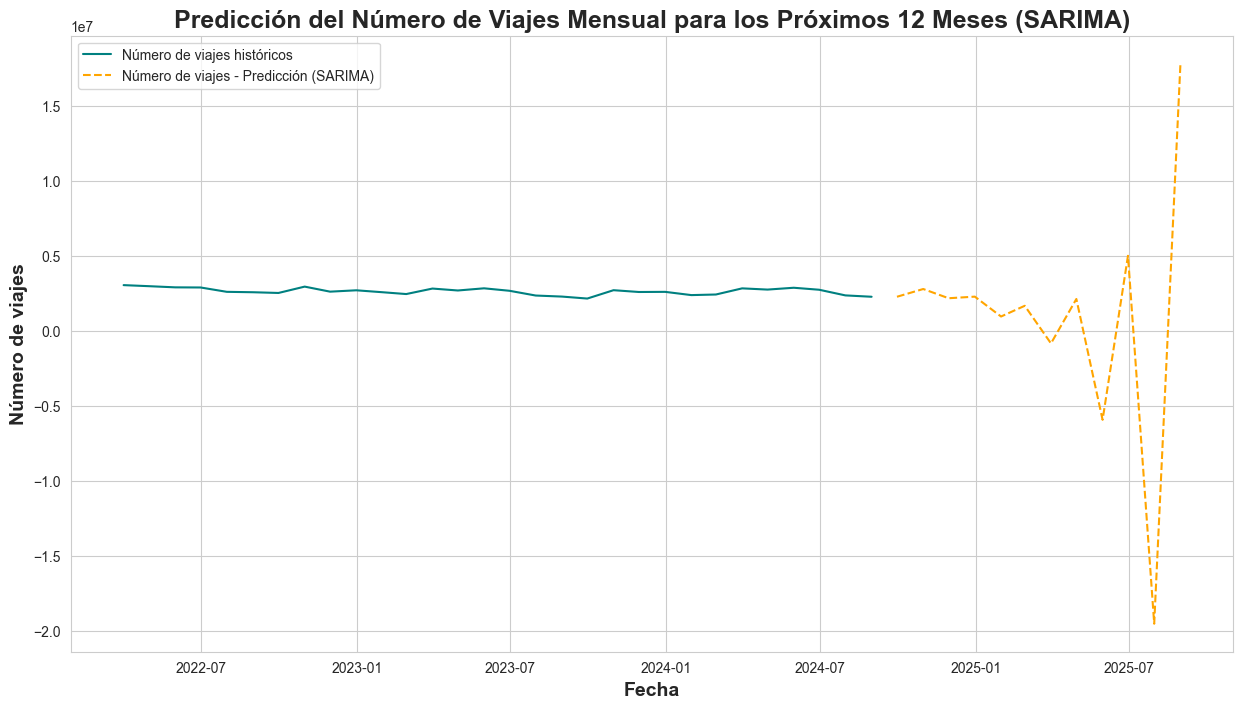

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
plt.plot(mensual.index, mensual['n_trips'], label='Número de viajes históricos', color='teal')
plt.plot(forecast_df.index, forecast_df['n_trips'], label='Número de viajes - Predicción (SARIMA)', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual para los Próximos 12 Meses (SARIMA)', fontsize=18, fontweight='bold')
plt.legend()
plt.show()

In [57]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg